## Project Documentation (Lab 1)

### Programming language: Python 3.10.7

In [1]:
!python --version

Python 3.10.7


### Task 1.2 implementation ($\bf{Norm(mu,sigma)}$ empirical & theoretical CDF)

<b>Data Source:</b> randomly generated values for Normal distribution with parameters:
<ul>
    <li>mu = 1.5</li>
    <li>sigma = 4</li>
</ul>
Value Generator: scipy.stats.norm submodule of scipy.stats
<br>(Assuming scipy stats is a trusted data source and generates random values correctly)

In [2]:
from random import random,randint
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import time
import pandas as pd
from statistics import mean
from fitter import Fitter, get_common_distributions, get_distributions
from scipy.stats import norminvgauss
from math import sqrt

<b>Parameters for a Theoretical CDF are fitted below using the $\text{Fitter}$ module</b>
<br>Assuming the theoretical distribution function is either equivalent to <b>Norm(mu,sigma)</b><br>
or is a distribution function contained in the get_common_distributions() method of the $Fitter$ library

In [3]:
print("common distributions:")
get_common_distributions()

common distributions:


['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

Fitting 10 distributions: 100%|████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.16it/s]


(mu,sigma) ~= (1.4705337269854863, 3.995563272831519)


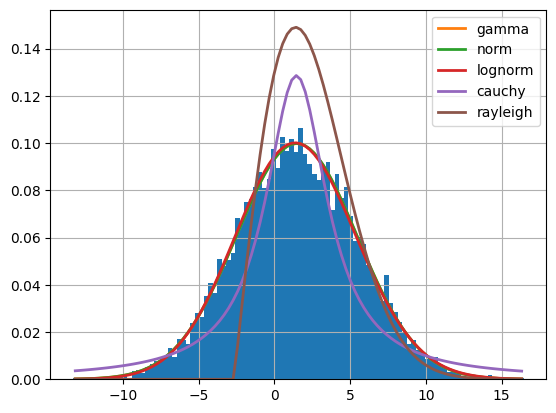

In [4]:
from scipy.stats import norm
mu=1.5
sigma=4
samples1=norm.rvs(mu,sigma,10000)


f1 = Fitter(samples1,distributions=get_common_distributions())
f1.fit()
f1.summary()
params1=f1.fitted_param["norm"]
print("(mu,sigma) ~=",params1)

Function <b>drawEmpyricalCDF(axes, samples, label):</b>
<ul>
    <li>Arg: axes - matplotlib.pyplot axes object</li>
    <li>Arg: samples - empyrical CDF values for every $x_i = x_{i-1}+delta$, where $delta = 1/n$<br>Where n = length(samples), $i=\overline{\textit{0, n-2}}$</li>
    <li>Arg: label - plot label</li>
    <li><ol>
        <li>X - an array of segments $(samples[i],samples[i+1])$, $i=\overline{\textit{0, n-1}}$</li>
        <li>Y - an array of CDF values (twice for every segment): $(\frac{(i_k+\textit{diff})}{n},\frac{(i_k+\textit{diff})}{n})$ where <br> $i_k=i_0+k*\textit{delta}, k=\overline{\textit{0, n-2}}$</li>
        <li>Plot the CDF using the ax.plot() method</li>
    </ol></li>
</ul>
<br>
Function <b>err_cdf(samples,dist,params):</b>
<ul>
    <li>Arg: $\textit{samples}$ - a random sample</li>
    <li>Arg: $\textit{dist}$ - a theoretical distribution function</li>
    <li>Arg: $\textit{params}$ theoretical distribution function parameters</li>
    <li>for each $size$ in [100,200,500,2000,3000,5000,7000,10000]:<ol>
        <li>Select a random subsample of size $size$</li>
        <li>Draw the Theoretical CDF using the given parameters $params$</li>
        <li>Draw an empyrical CDF based on the random subsample</li>
        <li>Differentiate two CDFs and compute the standard error of the CDF difference. Store the resulting $\textit{standard error}$ in a numpy array</li>
        <li>Print errors and display the results</li>
    </ol></li>
</ul>

In [5]:
def drawEmpyricalCDF(ax,_samples,label):
    mean=_samples.mean()
    var=np.array([x**2 for x in _samples]).mean()-mean**2
    samples=np.sort(_samples)
    
    n=len(samples)
    seg0=samples[0]
    seg1=None
    X=[]
    Y=[]
    i0=0
    diff=0
    for i in range(len(samples)-1):
        seg1=samples[i+1]
        diff+=1
        if abs(seg1-seg0)>0.1:
            X.append(seg0)
            X.append(seg1)
            Y.append((i0+diff)/n)
            Y.append((i0+diff)/n)
            seg0=samples[i+1]
            seg1=None
            i0=i
            diff=0
          
    ax.plot(X,Y,"b",label=label)

def err_cdf(samples,dist,params):
    print("params =",params)
    iarr=[100,200,500,2000,3000,5000,7000,10000]

    rep=10
    results=[0]*len(iarr)
    fig,axes=plt.subplots(4,2, figsize=(15,14))
    for r in range(rep):
        for _i in range(len(iarr)):
            ax=None
            if (_i>=4):
                ax=axes[_i-4,1]
            else:
                ax=axes[_i,0]
            i=iarr[_i]
            samp=np.random.choice(samples,i)
            samp.sort()

            bins=100
            
            
            actual,_samp = ax.hist(samp,bins=bins,color="blue",density=True,label="actual")[:2]
            ax.cla()
            drawEmpyricalCDF(ax,samp,"actual")

            expected=[dist.pdf(a,*params) for a in _samp[:-1]]

            ax.plot(_samp[:-1],[dist.cdf(a,*params) for a in _samp[:-1]],color="red",label="expected ("+str(dist.name)+")")

            diff = np.array([abs(actual[i]-expected[i]) for i in range(bins)])
            serr=sqrt(diff.std())
            results[_i]+=serr
            if (r==rep-1):
                ax.set_title("sample size = %d"%i)
                ax.legend()
    
    plt.show()
    results=[r/rep for r in results]

    plt.close()
    for i in range(len(iarr)):
        print("standard error for sample size = %d : %.6f"%(iarr[i],results[i]))


### Empyrical & Theoretical CDF

params = (1.4705337269854863, 3.995563272831519)


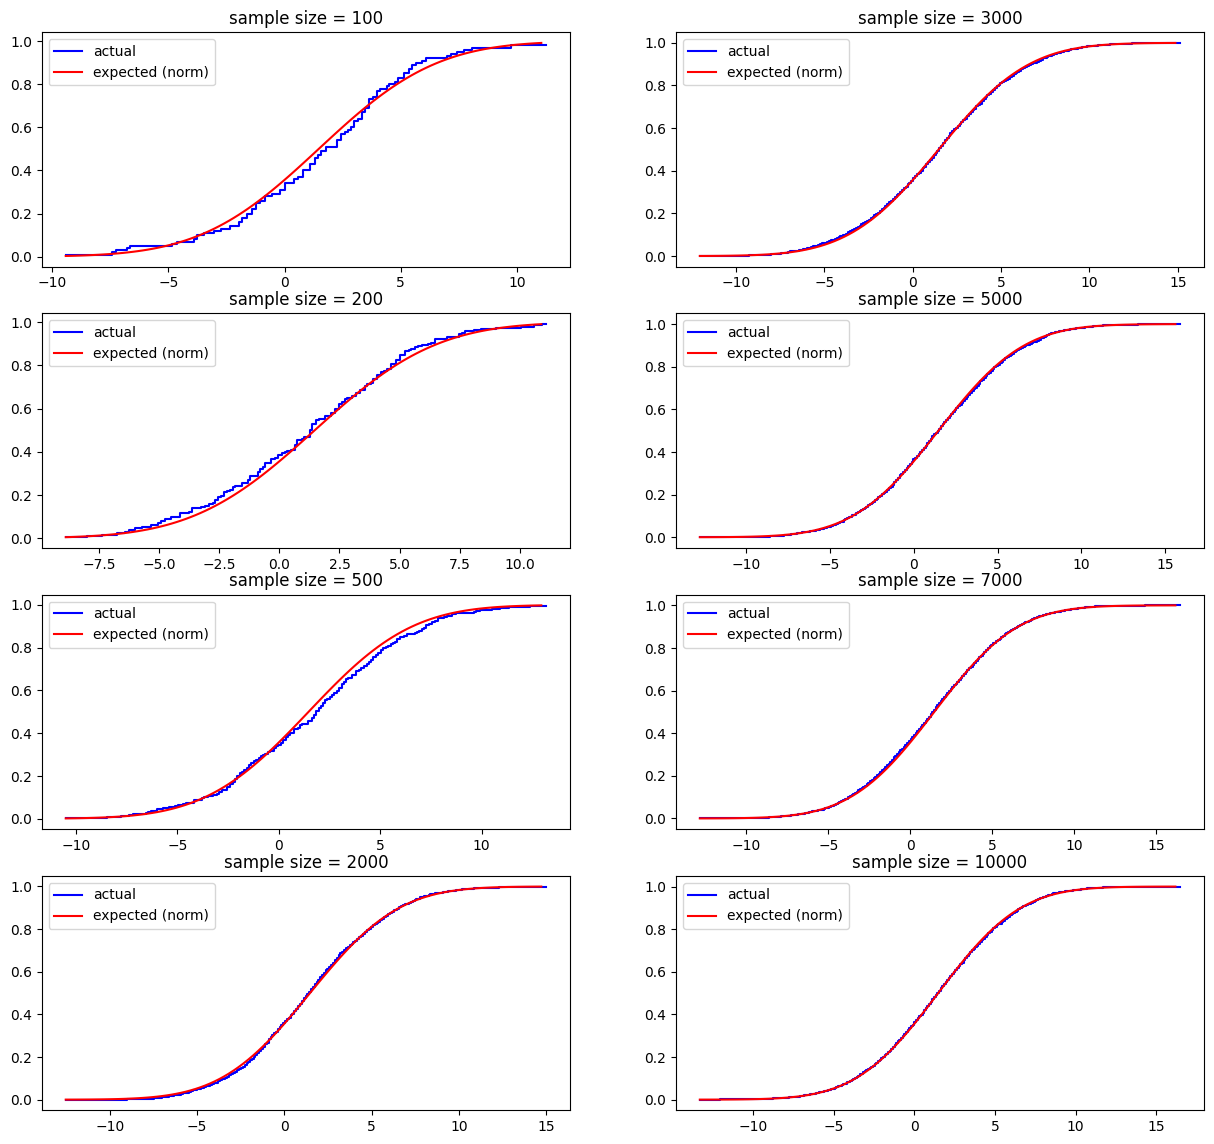

standard error for sample size = 100 : 0.182192
standard error for sample size = 200 : 0.147523
standard error for sample size = 500 : 0.117449
standard error for sample size = 2000 : 0.083668
standard error for sample size = 3000 : 0.075714
standard error for sample size = 5000 : 0.069408
standard error for sample size = 7000 : 0.063295
standard error for sample size = 10000 : 0.060442


In [6]:
err_cdf(samples1,norm,params1)

### Task 1.1 (additional), Analyzing the Triangulation algorithm execution time

### Task 1.1 implementation:
<br/>
Subtask1 (Triangulation algorithm execution time)
<ol>
    <li>Load samples</li>
    <li>Draw empyrical PDF</li>
    <li>Fit parameters for a suggested distribution (norminvgauss) using Fitter python module</li>
    <li>Draw empyrical & Theoretical PDF</li>
    <li>Evaluate standard error between Empyrical & Theoretical PDF</li>
    <li>Show that the standard error decreases as sample size grows (empirical PDF -> theoretical PDF, n->inf)</li>
</ol>
<br/>
Subtask2 (Normal distribution empirical CDF)
<ol>
    <li>Generate random Norm(mu,sigma) values</li>
    <li>Draw empyrical CDF</li>
    <li>Fit parameters for a suggested distribution (norm) using the Fitter python module</li>
    <li>Evaluate standard error for the difference between Empyrical & Theoretical CDF</li>
    <li>Show that the standard error limits to zero as sample size grows (empirical CDF -> theoretical CDF, n->inf)</li>
</ol>

#### Functions for saving/loading sample data

In [7]:
def saveSamples(samples,location):
    with open(location,"w+") as f:
        for sample in samples:
            f.write(' '.join(map(str,sample))+'\n')

def readSamples(location):
    samples=[]
    with open(location,"r") as f:
        for line in f.readlines():
            samples.append(list(map(float,line.split())))
    return samples

In [8]:
fname3="sample-data-3.txt"

File: "sample-data-3.txt" - Point set Triangulation algorithm execution time for 100 points (sample size: 10000)<br/>

<b>The data was obtained by executing the below algorithm:</b><br/>
(<b>Triangulation algorithm</b>: https://github.com/al3xkras/ComputationalGeometryCourseProjectKNU)

In [9]:
samples=readSamples(fname3)[0]
len(samples)

10000

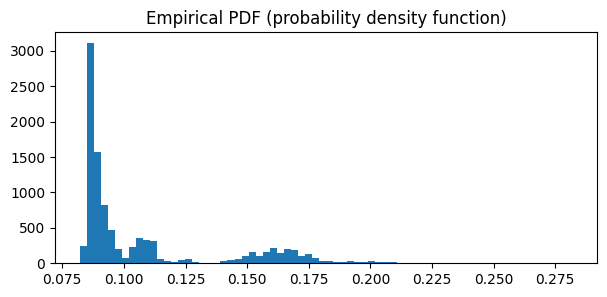

In [10]:
plt.gcf().set_size_inches((7,3))
plt.hist(samples, bins=70)
plt.title("Empirical PDF (probability density function)")
plt.show()

#### Theoretical distribution (suggested by Fitter): norminvgauss

Normal inverse Gauss distribution parameters calculation process is shown below.

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:10<00:00, 10.58s/it]


(2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)


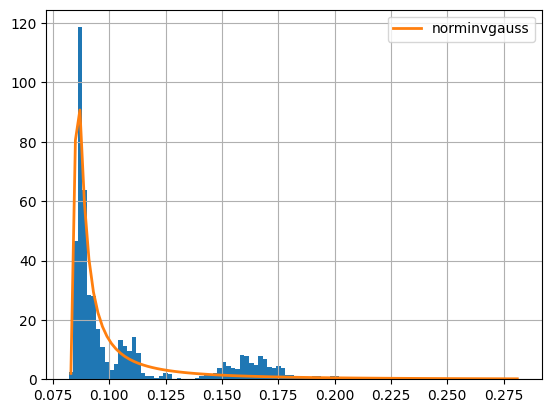

In [11]:
f = Fitter(samples,distributions= ["norminvgauss"])
f.fit()
f.summary()
params=f.fitted_param["norminvgauss"]
print(params)

### Plotting the Normal inverse Gauss distribution PDF (theoretical PDF)

fitted parameters: (2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)


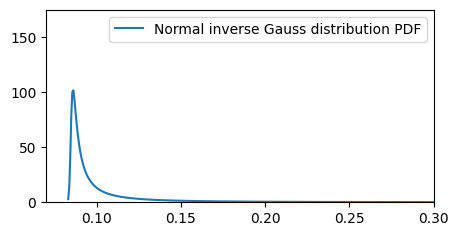

In [12]:
params=f.fitted_param['norminvgauss']
    
x = np.linspace(norminvgauss.ppf(0.001, *params),
                norminvgauss.ppf(0.999, *params),1000)
pdf = norminvgauss.pdf(x,*params)

plt.plot(x,pdf,label="Normal inverse Gauss distribution PDF")
plt.ylim(0,175)
plt.xlim(0.07,0.3)
plt.legend()
print("fitted parameters:",params)
plt.gcf().set_size_inches(5,2.5)
plt.show()

<h3>Calculating the standard error between theoretical & empirical PDF</h3>
</br>(Depending on the sample size)

params = (2.469494132931309, 2.46282262681328, 0.08435554713051517, 0.0017098074789276005)
standard error for sample size = 100 : 3.170142
standard error for sample size = 200 : 2.757837
standard error for sample size = 500 : 2.601013
standard error for sample size = 2000 : 2.354968
standard error for sample size = 5000 : 2.312885
standard error for sample size = 7000 : 2.281375
standard error for sample size = 10000 : 2.130213


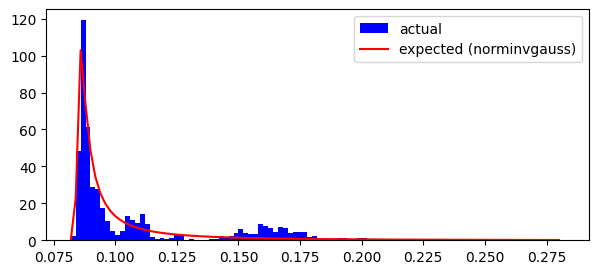

In [13]:
def err(samples,dist,params):
    print("params =",params)
    iarr=[100,200,500,2000,5000,7000,10000]

    rep=10
    results=[0]*len(iarr)
    for r in range(rep):
        for _i in range(len(iarr)):
            i=iarr[_i]
            samp=np.random.choice(samples,i)
            samp.sort()

            bins=100
            plt.cla()
            actual,_samp = plt.hist(samp,bins=bins,color="blue",density=True,label="actual")[:2]

            expected=[dist.pdf(a,*params) for a in _samp[:-1]]

            plt.plot(_samp[:-1],expected,color="red",label="expected ("+str(dist.name)+")")

            diff = np.array([abs(actual[i]-expected[i]) for i in range(bins)])
            serr=sqrt(diff.std())
            results[_i]+=serr

    results=[r/rep for r in results]


    for i in range(len(iarr)):
        print("standard error for sample size = %d : %.6f"%(iarr[i],results[i]))
    plt.gcf().set_size_inches(7,3)
    plt.legend()
    plt.show()

err(samples,norminvgauss,params)